In [90]:
# Modues to be used
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


#import tensorflow as tf

from datetime import datetime

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder


In [2]:
# Load data from pickle files

# -> Player dictionary with the dataFrames
f = open('data/dict_player.pickle', 'rb')
dict_player = pickle.load(f)

# -> Map dataFrames
f = open('data/df_map.pickle','rb')
df_map = pickle.load(f)

# -> Map dictionary
f = open('data/dict_map.pickle','rb')
dict_map = pickle.load(f)

# Let's look at the upsets to see if there's any info in the data

In [31]:
df_map[['team_rank_1','team_rank_2']]

team_rank_1  team_rank_2
12838            0            0
12839            0            0
12840            0            0
12841            0            0
12848            0            0
...            ...          ...
97591           18           14
97592            0            0
97593           18           14
97594            0            0
97595           18           14

[73848 rows x 2 columns]

In [36]:
#df_upsets = df_map[ df_map['winner']]  ]
aux=( ( (df_map['team_rank_1'] < df_map['team_rank_2']) & df_map['winner']==2 ) | ( (df_map['team_rank_1'] > df_map['team_rank_2']) & df_map['winner']==1 ) ) & ((df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) & (df_map['date'] > datetime(2018,1,1)) )


df_upsets = df_map[aux]

df_no_upsets = df_map[(~aux) & ((df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) & (df_map['date'] > datetime(2018,1,1))) ]

rank_fav = df_upsets[df_upsets['team_rank_1']<df_upsets['team_rank_2']].values

rank_fav = df_no_upsets[df_no_upsets['team_rank_1']<df_no_upsets['team_rank_2']]
rank_fav

array([[59518, 'mrg', Timestamp('2018-01-04 18:05:00'), ..., 21.0, 21, 2],
       [59520, 'trn', Timestamp('2018-01-04 18:05:00'), ..., 19.0, 21, 2],
       [59528, 'trn', Timestamp('2018-01-05 14:00:00'), ..., 17.0, 21, 2],
       ...,
       [97582, 'd2', Timestamp('2020-01-09 19:50:00'), ..., 9.0, 11, 2],
       [97586, 'nuke', Timestamp('2020-01-09 19:50:00'), ..., 14.0, 11,
        2],
       [97591, 'trn', Timestamp('2020-01-10 00:35:00'), ..., 20.0, 14, 2]],
      dtype=object)

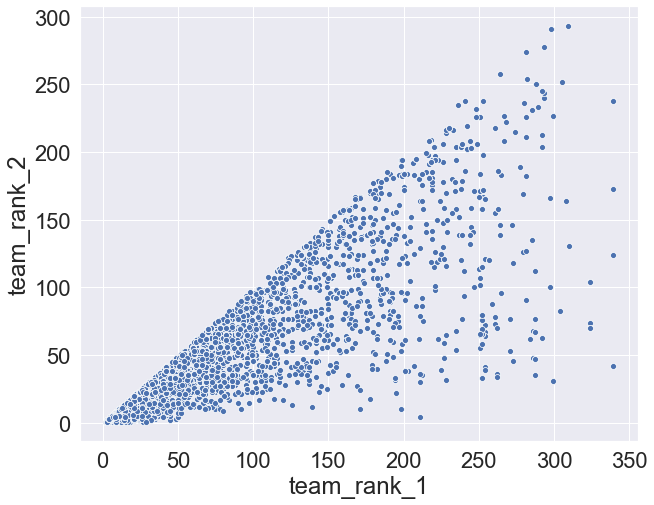

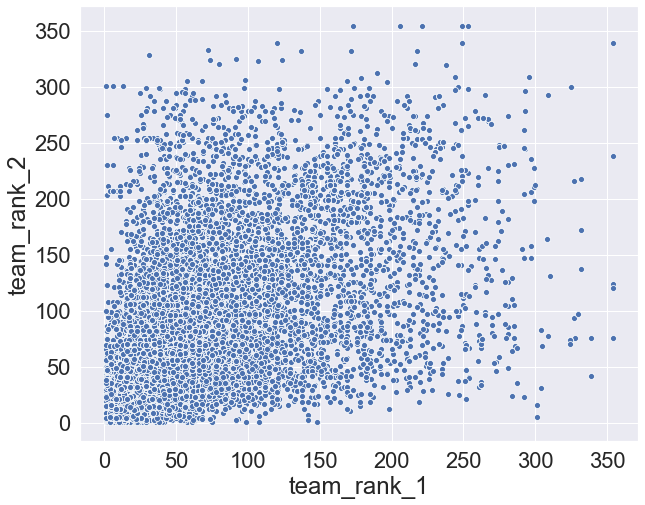

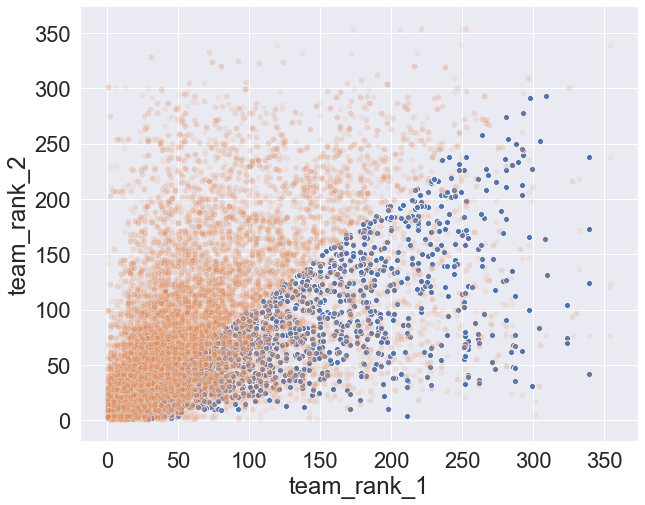

In [30]:
sns.set_style("whitegrid")
sns.set(font_scale=2)
#sns.set_palette("pastel")

plt.figure(figsize=(10,8))
# ax1 = sns.scatterplot(data=data_tmp,x='win',y='ADR')

sns.scatterplot(data=df_upsets,x='team_rank_1',y='team_rank_2')

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_no_upsets,x='team_rank_1',y='team_rank_2')

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_upsets,x='team_rank_1',y='team_rank_2',alpha=1)
sns.scatterplot(data=df_no_upsets,x='team_rank_1',y='team_rank_2',alpha=0.1)


# Principal Component Analysis (PCA)
Let's take a look at what features are most important when looking at the score differential for each match

In [4]:
df_map.head()

map_id  map                date  event_id  \
12838   12838  NaN 2012-09-13 19:00:00       965   
12839   12839  NaN 2012-09-13 19:00:00       965   
12840   12840  NaN 2012-09-13 19:00:00       966   
12841   12841  NaN 2012-09-13 19:00:00       966   
12848   12848  NaN 2012-09-23 12:00:00       973   

                                      event_name  team_id_1 team_name_1  \
12838                            Go4CS:GO Cup #6       4411         NiP   
12839                            Go4CS:GO Cup #6       4411         NiP   
12840  CyberGamer Qualifier Cup #1 by Tt eSPORTS       4444      Blight   
12841  CyberGamer Qualifier Cup #1 by Tt eSPORTS       4444      Blight   
12848                    DreamHack Valencia 2012       4411         NiP   

       team_score_1  team_kills_1  team_deaths_1  team_assists_1  team_rank_1  \
12838            16          91.0           46.0             0.0            0   
12839            16          83.0           34.0             0.0            0   
12840            16          81.0           37.0             0.0            0   
12841            16          97.0           58.0             0.0            0   
12848            16         102.0           86.0             0.0            0   

       team_id_2 team_name_2  team_score_2  team_kills_2  team_deaths_2  \
12838       4443       PRiME             3          45.0           91.0   
12839       4443       PRiME             1          34.0           83.0   
12840       4445   FMESPORTS             2          37.0           81.0   
12841       4445   FMESPORTS             7          57.0           97.0   
12848       4467   VeryGames            10          86.0          102.0   

       team_assists_2  team_rank_2  winner  
12838             0.0            0       1  
12839             0.0            0       1  
12840             0.0            0       1  
12841             0.0            0       1  
12848             0.0            0       1

In [56]:
dict_player[player_id].tail()
#list(dict_map[map_id])[1]

map                date  team_id team_name  player_id player_name  \
map_id                                                                          
97560       trn 2020-01-09 16:00:00     7175    Heroic       7964      cadiaN   
97565      nuke 2020-01-09 16:00:00     7175    Heroic       7964      cadiaN   
97579      nuke 2020-01-09 20:05:00     7175    Heroic       7964      cadiaN   
97581   vertigo 2020-01-09 20:05:00     7175    Heroic       7964      cadiaN   
97572       trn 2020-01-09 20:05:00     7175    Heroic       7964      cadiaN   

        kills  hs_kills  assists  flash_assists  ...  first_kills_diff  \
map_id                                           ...                     
97560      19         4        5              3  ...                 0   
97565      22         4        6              2  ...                 4   
97579      16         5        4              1  ...                 1   
97581      12         8        1              0  ...                -1   
97572       7         2        1              0  ...                -3   

        rating  kills_per_round  deaths_per_round  impact  team_score  \
map_id                                                                  
97560     0.99             0.83              0.83    0.53           7   
97565     1.23             0.76              0.59    1.61          13   
97579     0.96             0.62              0.62    0.83          16   
97581     0.78             0.57              0.81    0.70           5   
97572     0.31             0.37              0.89    0.35           3   

        op_score  win  team_rank  prize  
map_id                                   
97560         16    0         16    0.0  
97565         16    0         16    0.0  
97579         10    1         16    0.0  
97581         16    0         16    0.0  
97572         16    0         16    0.0  

[5 rows x 24 columns]

In [87]:
map_name = 'trn'

DAYS_WEIGHT = 365

time_1 = datetime.now()

# df_tmp = df_map[ (df_map['date']>datetime(2019,1,1)) & ( (df_map['team_rank_1']<30) | (df_map['team_rank_2']<30) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]

#df_tmp = df_map[ (df_map['date']>datetime(2018,1,1)) & ( (df_map['team_rank_1']<30) | (df_map['team_rank_2']<30) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]


# df_tmp = df_map[ (df_map['map']==map_name) &
#     (df_map['date']>datetime(2019,1,1)) & ( (df_map['team_rank_1']<20) & (df_map['team_rank_2']<20) ) & ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) )]

df_tmp = df_map[ (df_map['map']==map_name) & (df_map['date']>datetime(2019,1,1)) &
    ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) ) ]


df_tmp = df_map[ (df_map['date']>datetime(2019,1,1)) &
    ( (df_map['team_rank_1']>0) & (df_map['team_rank_2']>0) ) ]


dict_train = {}

print( len( df_tmp['map_id']) )

for map_id in df_tmp['map_id'][:500]:

    map_date = df_tmp.loc[map_id]['date']

    dict_train[map_id] = {}    

    team_1 = df_tmp.loc[map_id]['team_id_1']
    team_2 = df_tmp.loc[map_id]['team_id_2']

    # Here we are taking the rankings to be non-zero
    rank_1 = df_tmp.loc[map_id]['team_rank_1']
    rank_2 = df_tmp.loc[map_id]['team_rank_2']

    score_1 = df_tmp.loc[map_id]['team_score_1']
    score_2 = df_tmp.loc[map_id]['team_score_2']

    winner = df_tmp.loc[map_id]['winner']

    if rank_1 < rank_2:
        fav = 0

        team_fav = team_1
        team_op  = team_2

        dict_train[map_id]['rank_dif'] = rank_2-rank_1

        dict_train[map_id]['score_dif'] = score_1-score_2

        if winner == 1:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0

    else:
        fav = 1

        team_fav = team_2
        team_op  = team_1

        dict_train[map_id]['rank_dif'] = rank_1-rank_2

        dict_train[map_id]['score_dif'] = score_2-score_1

        if winner == 2:
            dict_train[map_id]['fav_win'] = 1
        else:
            dict_train[map_id]['fav_win'] = 0

    count_team = -1
    for team_id in dict_map[map_id]:

        count_team = count_team + 1

        weighted_rating    = []
        weighted_kast      = []
        weighted_kpr       = []
        weighted_round_dif = []

        # prize = []

        if team_id == team_1:
            team_other = team_2
        else:
            team_other = team_1

        for player_id in dict_map[map_id][team_id]['players_id']:            

            #df_aux = dict_player[player_id][ dict_player[player_id]['map']==map_name ]
            df_aux = dict_player[player_id]

            date_vec = (map_date-df_aux['date']).astype('timedelta64[D]')

            # date_vec = (map_date-dict_player[player_id]['date']).astype('timedelta64[D]')

            # df_op_rank = df_tmp[ df_tmp['team_rank_1'] ]

            # df_aux = dict_player[player_id][ (date_vec>1) & (date_vec<DAYS_WEIGHT)  ]

            #df_aux = dict_player[player_id][ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

            # df_aux = df_aux[ df_aux['map']==map_name ]

            df_aux = df_aux[ (date_vec>1) & (date_vec<DAYS_WEIGHT) ]

            # try:
            #     m = float(1.0)/ sum( date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)]-DAYS_WEIGHT )
            # except:
            #     m = 0.0

            # w_i = m * (date_vec[(date_vec>1) & (date_vec<DAYS_WEIGHT)] - DAYS_WEIGHT)

            w_i = 1.0

            count = 0
            rtg = 0.0
            for map_2 in df_aux.index:
                #print(map_2)
                if (team_other == df_map.loc[map_2]['team_id_1'])  | (team_other == df_map.loc[map_2]['team_id_2']):
                    
                    count = count + 1
                    rtg = rtg + df_aux.loc[map_2]['team_score'] - df_aux.loc[map_2]['op_score'] 

            # weighted_rating.append( sum(df_aux['rating'] * w_i) )
            # weighted_kast.append( sum(df_aux['KAST'] * w_i / 100.0) )
            # weighted_kpr.append( sum(df_aux['kills_per_round'] * w_i) )
            
            try:
                weighted_round_dif.append( rtg / float(count) )
            except:
                continue

                    # weighted_rating.append( sum(df_aux['rating'] * w_i) )
                    # weighted_kast.append( sum(df_aux['KAST'] * w_i / 100.0) )
                    # weighted_kpr.append( sum(df_aux['kills_per_round'] * w_i) )
                    
                    # weighted_round_dif.append( sum( (df_aux['team_score']-df_aux['op_score']) * w_i) )

            # prize.append( sum(dict_player[player_id][  ['prize'] ) )

        #order = np.argsort( weighted_rating )

        # if count_team == fav:
        #     count_p = -1
        #     for ind in order:
        #         count_p = count_p + 1
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_rating'] = weighted_rating[ind]
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_kast'] = weighted_rating[ind]
        #         dict_train[map_id]['t_0_p_'+str(count_p)+'_kpr'] = weighted_rating[ind]
        # else:
        #     count_p = -1
        #     for ind in order:
        #         count_p = count_p + 1
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_rating'] = weighted_rating[ind]
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_kast'] = weighted_rating[ind]
        #         dict_train[map_id]['t_1_p_'+str(count_p)+'_kpr'] = weighted_rating[ind]

        if count_team == fav:

            # dict_train[map_id]['t_0_avg_rating'] = np.average( weighted_rating )
            # dict_train[map_id]['t_0_std_rating'] = np.std( weighted_rating )

            # dict_train[map_id]['t_0_avg_kast'] = np.average( weighted_kast )
            # dict_train[map_id]['t_0_std_kast'] = np.std( weighted_kast )

            # dict_train[map_id]['t_0_avg_kpr'] = np.average( weighted_kpr )
            # dict_train[map_id]['t_0_std_kpr'] = np.std( weighted_kpr )

            dict_train[map_id]['t_0_avg_rd'] = np.average( weighted_round_dif )
            #dict_train[map_id]['t_0_std_rd'] = np.std( weighted_round_dif )

        else:
            
            # dict_train[map_id]['t_1_avg_rating'] = np.average( weighted_rating )
            # dict_train[map_id]['t_1_std_rating'] = np.std( weighted_rating )

            # dict_train[map_id]['t_1_avg_kast'] = np.average( weighted_kast )
            # dict_train[map_id]['t_1_std_kast'] = np.std( weighted_kast )

            # dict_train[map_id]['t_1_avg_kpr'] = np.average( weighted_kpr )
            # dict_train[map_id]['t_1_std_kpr'] = np.std( weighted_kpr )

            dict_train[map_id]['t_1_avg_rd'] = np.average( weighted_round_dif )
            #dict_train[map_id]['t_1_std_rd'] = np.std( weighted_round_dif )

         
    

time_2 = datetime.now()

print( time_2-time_1 )
#date_vec

10466
/home/emmanuel/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/lib/function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/emmanuel/miniconda3/envs/tf/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
0:07:38.620467


500


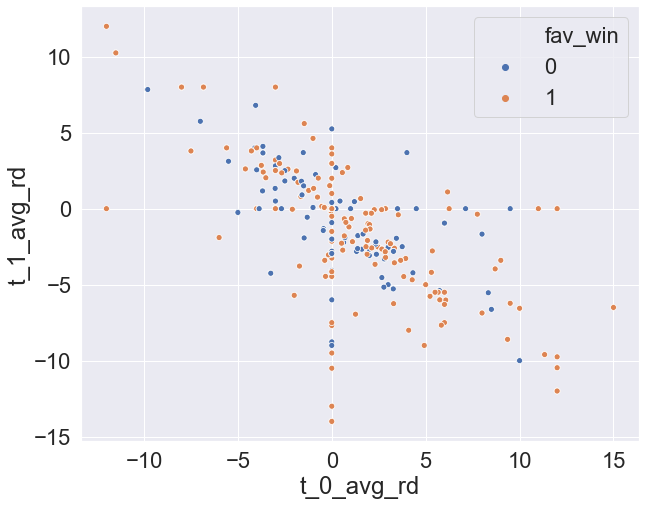

In [88]:
dict_train
df_train = pd.DataFrame.from_dict(dict_train,orient='index')

df_train = df_train.fillna(0)

#for map_id in df_train.index:
    #df_train.at[map_id,'rank_rating'] = np.log(df_train.at[map_id,'rank_dif']+1)
    #df_train.at[map_id,'rank_rating'] = np.log(df_train.at[map_id,'rank_dif'])
    #df_train.at[map_id,'rank_rating'] = df_train.at[map_id,'t_1_avg_rating'] / df_train.at[map_id,'rank_dif']

df_train.head(n=50)

#df_aux.tail()

#len(df_train.rank_rating.unique())

# len(df_train)
# df_aux

print(len(df_train))

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_train,x='t_0_avg_rd',y='t_1_avg_rd',hue='fav_win',alpha=1)



In [95]:
df_train.head(n=100)

rank_dif  score_dif  fav_win  t_0_avg_rd  t_1_avg_rd
79922         9         -5        0   -1.518519    3.688889
79923         9         -7        0   -1.518519    3.688889
79943        80          2        1    2.800000   -3.305161
79945        80         -8        0    2.800000   -3.305161
79947        80         -9        0    2.800000   -3.305161
...         ...        ...      ...         ...         ...
80106        15         -8        0   -3.750000    2.850427
80107        15         11        1   -3.750000    2.850427
80116        15          7        1   -3.750000    2.850427
80118        70         -2        0    0.000000    0.000000
80119        70        -12        0    0.000000    0.000000

[100 rows x 5 columns]

In [102]:
df_train['fav_win'].mean()

0.584

In [142]:
# Divide data set into training and testing sets
# -> We use 75% of the data for training and 25% for testing
#X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','rank_dif'],axis=1),df_train['fav_win'], test_size=0.25)

#X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','rank_dif'],axis=1),df_train['fav_win'], test_size=0.3)

X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['fav_win','score_dif'],axis=1),df_train['fav_win'], test_size=0.2)

#X_train, X_test, y_train, y_test = train_test_split(x_orig,y_orig, test_size=0.25)

# Make an instance of the model, and increase the maximum number of iterations to avoid convergence problems
logmodel = LogisticRegression(max_iter=800)



# Training for the model
logmodel.fit(X_train,y_train)

# Now we use the testing data set to make predictions and evaluate the model's performance
predictions = logmodel.predict(X_test)

print('>'+classification_report(y_test,predictions,target_names=['Underdog wins','Favorite wins']))

#predictions[:] = 1

#c_mat = confusion_matrix(y_test.values, predictions)
c_mat = confusion_matrix(y_test, predictions)
print( c_mat )

accuracy = (c_mat[0][0] + c_mat[1][1]) / np.sum(c_mat)
print(accuracy)

probs = logmodel.predict_proba(X_test)

for ind in range(0, np.shape(probs)[0] ):
    print( probs[ind,0:2], y_test.values[ind], predictions[ind] )
print(np.shape(probs))
print(np.shape(y_test.values))
np.concatenate((probs,y_test.values),axis=0)

>               precision    recall  f1-score   support

Underdog wins       0.50      0.09      0.15        45
Favorite wins       0.55      0.93      0.69        55

     accuracy                           0.55       100
    macro avg       0.53      0.51      0.42       100
 weighted avg       0.53      0.55      0.45       100

[[ 4 41]
 [ 4 51]]
0.55
[0.44491259 0.55508741] 0 1
[0.56681724 0.43318276] 0 0
[0.42349313 0.57650687] 1 1
[0.27083083 0.72916917] 1 1
[0.39599215 0.60400785] 0 1
[0.3137675 0.6862325] 0 1
[0.41501549 0.58498451] 0 1
[0.36709494 0.63290506] 0 1
[0.4230043 0.5769957] 0 1
[0.39619015 0.60380985] 0 1
[0.42224856 0.57775144] 0 1
[0.45446063 0.54553937] 1 1
[0.23815972 0.76184028] 1 1
[0.42718934 0.57281066] 0 1
[0.39079477 0.60920523] 1 1
[0.51583161 0.48416839] 1 0
[0.51151446 0.48848554] 0 0
[0.44201748 0.55798252] 0 1
[0.48702928 0.51297072] 0 1
[0.32166795 0.67833205] 1 1
[0.30140454 0.69859546] 1 1
[0.41535376 0.58464624] 1 1
[0.36239544 0.63760456] 1 1
[0

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

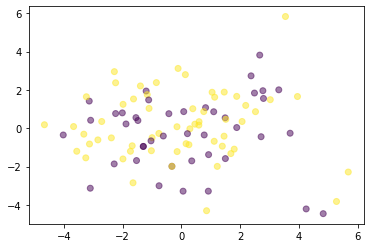

In [26]:
mat = df_train.values
# print( np.shape(mat) )
X = mat[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] 
# for col in range(0,np.shape(mat)[1]):
#     mat[:,col] = 1.0

#print(X)
y = mat[:,1]
# print(y)


n_samples  = np.shape(X)[0]
n_features = np.shape(X)[1]
n_components = min(n_samples, n_features)
pca = PCA(n_components=n_components)
pca.fit(X)

X_TR = pca.transform(X)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plt.scatter(X_TR[:,0], X_TR[:,1],c=mat[:,2], alpha=0.5)
plt.scatter(X_TR[:,0], X_TR[:,1], c=mat[:,2], alpha=0.5)

plt.show()

(100, 20)
[  3.   2.   7.   3.  -6.  -9. -14.  -3.   5.   2.   3.  -4.  -2.  -5.
  -3.  -4.  -9.  10.   7.   6.   2.  -4.  10.   7.  -2.  -2.  -2.   2.
  14.   5.   4.   7.   9.   2.  -2.  -8.  -2.   9.   4.   8.  -3.  -8.
  -3.   7.  -5.  -2.   4.   7.  -2.   7.  -9.  13.   6.   2.  -4.   8.
   5.  14.  -4. -13.   6.   4.   2.   3.  -7.  14.   4.  11. -14.   7.
  -6.  -2.   6.   7.   2.  -6.  -4.   4.  -4.  -3.  -6.   8.  -3.   9.
   4.   6.   3.  -4.   3.   8.  -7.  -8.   8.   8.  -2.  10.  10.  -2.
   9.   4.]
[4.98654737e-01 3.31956201e-01 1.04184796e-01 6.35207024e-02
 1.13685988e-03 2.08167008e-04 1.41119495e-04 1.18232885e-04
 2.76858605e-05 1.40785178e-05 1.05369232e-05 7.88038979e-06
 6.57010740e-06 5.46280901e-06 4.70833136e-06 2.26231882e-06
 0.00000000e+00]
[22.05134651 17.99183799 10.07946105  7.87032715  1.0529036   0.45054802
  0.37096134  0.33955043  0.16431006  0.11716924  0.10136594  0.08766152
  0.08004263  0.0729866   0.06775926  0.04696908  0.        ]


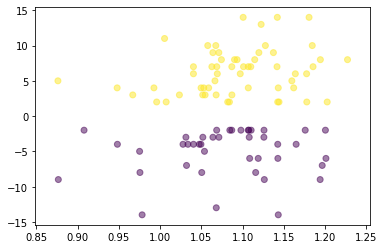

In [18]:
mat = df_train.values
# print( np.shape(mat) )
X = mat[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]] 
# for col in range(0,np.shape(mat)[1]):
#     mat[:,col] = 1.0

#print(X)
y = mat[:,1]
# print(y)


n_samples  = np.shape(X)[0]
n_features = np.shape(X)[1]
n_components = min(n_samples, n_features)
pca = PCA(n_components=n_components)
pca.fit(X)

X_TR = pca.transform(X)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

#plt.scatter(X[:,0], X[:,1], c=mat[:,2], alpha=0.5)
plt.scatter(X[:,0], y, c=mat[:,2], alpha=0.5)
plt.show()